In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Default title text
path = "/content/drive/MyDrive/praktikum_ml/praktikum04"

In [4]:
# Import library utama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [5]:
df = pd.read_csv(path + '/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
# Mengecek missing value
print("\nMissing Value Tiap Kolom:")
print(df.isnull().sum())


Missing Value Tiap Kolom:
ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


In [9]:
# Mengecek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [10]:
print("Nilai unik pada kolom 'Kelamin':", df['Kelamin'].unique())
print("Nilai unik pada kolom 'Status':", df['Status'].unique())
print("Nilai unik pada kolom 'Memiliki_Mobil':", df['Memiliki_Mobil'].unique())
print("Nilai unik pada kolom 'Beli_Mobil':", df['Beli_Mobil'].unique())

Nilai unik pada kolom 'Kelamin': [0 1]
Nilai unik pada kolom 'Status': [1 2 3 0]
Nilai unik pada kolom 'Memiliki_Mobil': [0 1 2 4 3]
Nilai unik pada kolom 'Beli_Mobil': [1 0]


In [12]:
# Melihat korelasi antar variabel numerik
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


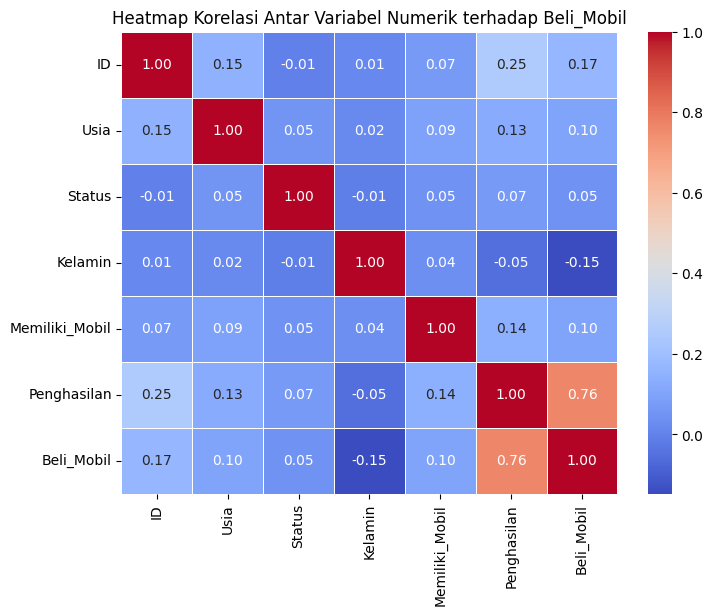

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik terhadap Beli_Mobil", fontsize=12)
plt.show()

In [14]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 5)
y shape: (1000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("\nData latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (800, 5)
Data uji: (200, 5)


In [18]:
# 1. Preprocessing: scaling hanya untuk fitur numerik
feature_num = ['Usia', 'Status', 'Memiliki_Mobil', 'Penghasilan']  # numerik
feature_bin = ['Kelamin']  # binary/kelas langsung passthrough

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

# 2. Buat model Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',  # karena mungkin ada ketidakseimbangan
    random_state=42
)

# 3. Gabungkan preprocessing + model dalam pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# 4. Latih model
clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


In [19]:
# 5. Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [20]:
# 6. Hitung metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
ConfusionMatrixDisplay, RocCurveDisplay, classification_report

print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi   : 0.9300
Precision : 0.9829
Recall    : 0.9055
F1-Score  : 0.9426
ROC AUC   : 0.9769


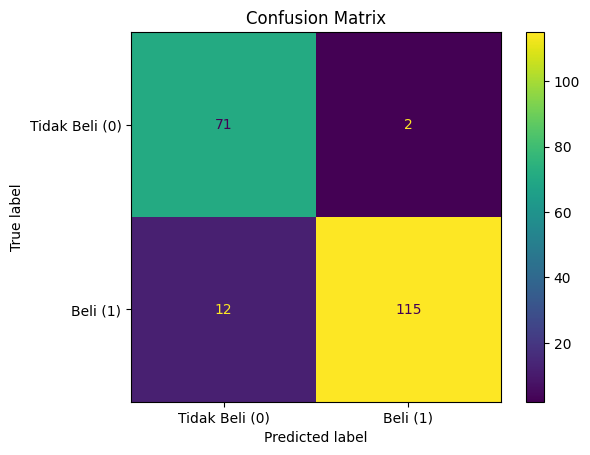

In [21]:
#Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli (0)', 'Beli (1)']
                      ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

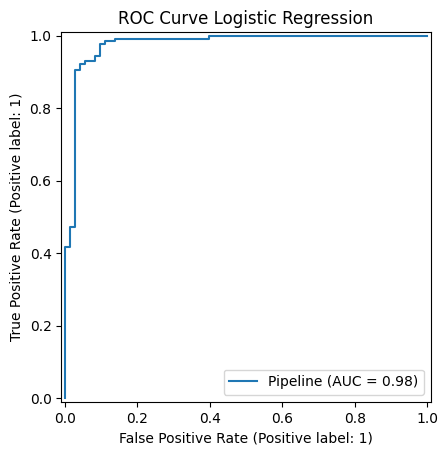

In [22]:
#ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [23]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))

                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.97      0.91        73
      Beli (1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



In [24]:
#Cross-validation (5-fold)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [26]:
# 11. Koefisien & Odds Ratio
import numpy as np
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
3,Penghasilan,4.553524,94.966518
2,Memiliki_Mobil,0.078348,1.081499
0,Usia,-0.047578,0.953536
1,Status,-0.133740,0.874818
4,Kelamin,-1.129122,0.323317


In [27]:
# 12. Contoh prediksi dataset baru
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Status': [1, 2],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [200, 150],
    'Kelamin': [1, 0]  # 1=Laki-laki, 0=Perempuan
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:,1]

hasil = data_baru.copy()
hasil['Prob_Beli'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

,Usia,Status,Memiliki_Mobil,Penghasilan,Kelamin,Prob_Beli,"Pred (0=Tidak,1=Ya)"
0,30,1,0,200,1,0.112369,0
1,45,2,1,150,0,0.031513,0
